<h1>Parkinson's Disease Prediction using ML Model</h1>

<h3> Importing all the required packages </h3>
<p>
Pandas – This library helps to load the data frame in a 2D array format and has multiple functions to perform analysis tasks in one go.<br>
Numpy – Numpy arrays are very fast and can perform large computations in a very short time.<br>
Matplotlib/Seaborn – This library is used to draw visualizations.<br>
Sklearn – This module contains multiple libraries having pre-implemented functions to perform tasks from data preprocessing to model development and evaluation.<br>
XGBoost – This contains the eXtreme Gradient Boosting machine learning algorithm which is one of the algorithms which helps us to achieve high accuracy on predictions.<br>
Imblearn – This module contains a function that can be used for handling problems related to data imbalance.
</p>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from tqdm.notebook import tqdm
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# #Suppresses warning messages to keep output clean (useful in notebooks).
import warnings
warnings.filterwarnings('ignore')

<h3>Loading the dataset into the panda’s data frame</h3>
<p>The dataset we are going to use here includes 755 columns and three observations for each patient. The value’s in these columns are part of some other diagnostics which are generally used to capture the difference between a healthy and affected person.</p>

In [5]:
df = pd.read_csv('parkinson_disease.csv')

<p> checking the size of the dataset</p>

In [7]:
df.shape

(756, 755)

<p>The dataset is very high dimensional as the feature space contains 755 columns.  check which column of the dataset contains which type of data.</p>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


<p>From above, We are sure that There are no NULL values</p>

In [11]:
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


<h1>Data Cleaning</h1>
<p>The data which is obtained from the primary sources is termed the raw data and required a lot of preprocessing before we can derive any conclusions from it or to some modeling on it. <br> Those preprocessing steps are known as data cleaning and it includes, outliers removal, null value imputation, and removing discrepancies of any sort in the data inputs.</p>

In [13]:
df = df.groupby('id').mean().reset_index()
df.drop('id', axis=1, inplace=True)

<h4> Code Breakdown</h4>
<p>df.groupby('id').mean()<br>
Groups the dataset by the 'id' column.
<br>
Computes the mean for all other numerical columns within each group.
<br>
This is useful when multiple rows exist for the same id, and you want a single representative row per id.
<hr>
.reset_index()
<br>
Converts the grouped result back into a DataFrame (instead of a grouped object).
<hr>
df.drop('id', axis=1, inplace=True)
<br>
Removes the 'id' column after aggregation, as it is no longer needed.
<br>
</p>
<P>Uses of Above Code Block</P>
<p>Improves model training<br>
 Removes redundancy<br>
Handles duplicate entries</p>


<p>These many features only indicate that they have been derived from one another or we can say that the correlation between them is quite high.<br> In the below code block a function has been implemented which can remove the highly correlated features except for the target column.</p>

In [16]:
columns = list(df.columns)
for col in columns:
	if col == 'class':
		continue

	filtered_columns = [col]
	for col1 in df.columns:
		if((col == col1) | (col == 'class')):
			continue

		val = df[col].corr(df[col1])

		if val > 0.7:
			# If the correlation between the two features is more than 0.7 remove
			columns.remove(col1)
			continue
		else:
			filtered_columns.append(col1)

	# After each iteration filter out the columns which are not highly correlated features.
	df = df[filtered_columns]
df.shape

(252, 287)

<p>So, from a feature space of 755 columns, we have reduced it to a feature space of 287 columns. But still, it is too high as the number of features is still more than the number of examples or data points. Reason behind this statement is the same as that behind the curse of dimensionality problem as the feature space grows the number of examples required to generalize on the dataset becomes difficult and the model’s performance decreases.
</p>
<p>So, let’s reduce the feature space up to 30 by using the <strong>chi-square test</strong>.</p>

<p><strong>Chi-Square test</strong> is done on two distributions two determine the level of similarity of their respective variances. In its null hypothesis, it assumes that the given distributions are independent. This test thus can be used to determine the best features for a given dataset by determining the features on which the output class label is most dependent.</p>

In [19]:
X = df.drop('class', axis=1)
X_norm = MinMaxScaler().fit_transform(X)
selector = SelectKBest(chi2, k=30)
selector.fit(X_norm, df['class'])
filtered_columns = selector.get_support()
filtered_data = X.loc[:, filtered_columns]
filtered_data['class'] = df['class']
df = filtered_data
df.shape

(252, 31)

<p>As the dimensionality of the dataset is under control now let’s check whether the dataset is balanced for both the classes or not.</p>

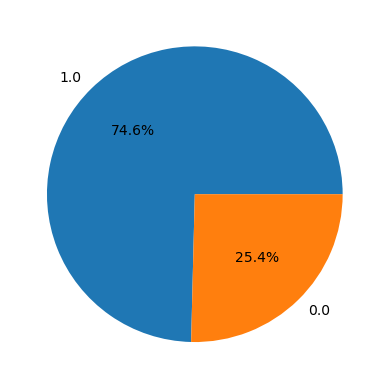

In [21]:
x = df['class'].value_counts()
plt.pie(x.values,
		labels = x.index,
		autopct='%1.1f%%')
plt.show()

<p>The dataset is Imbalance. We will have to deal with this problem otherwise the model trained on this dataset will have a harder time predicting positive classes which is our main objective here.</p>

<h2>Model Training</h2>
<p>Now we will separate the features and target variables and split them into training and the testing data by using which we will select the model which is performing best on the validation data.</p>

In [24]:
features = df.drop('class', axis=1)
target = df['class']

X_train, X_val,\
	Y_train, Y_val = train_test_split(features, target,
									test_size=0.2,
									random_state=10)
X_train.shape, X_val.shape

((201, 30), (51, 30))

<h3>Random Oversampling</h3>
<p><strong>Handling the data imbalance problem</strong> by using the over-sampling method on the minority class.</p>
<p> It balances the dataset by randomly duplicating rows from the minority class.</p>
<p>Useful when you have a small dataset and want to increase the representation of the minority class.</p>

In [26]:
# As the data was highly imbalanced we will balance it by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority',
						random_state=0)
X, Y = ros.fit_resample(X_train, Y_train)
X.shape, Y.shape

((302, 30), (302,))

<p>The dataset has been already normalized in the data cleaning step we can directly train some state-of-the-art machine learning models and compare them which fit better with our data.</p>

In [28]:
from sklearn.metrics import roc_auc_score as ras
models = [LogisticRegression(), XGBClassifier(),RandomForestClassifier(n_estimators=100, random_state=10), SVC(kernel='rbf', probability=True)]

for i in range(len(models)):
	models[i].fit(X, Y)

	print(f'{models[i]} : ')

	train_preds = models[i].predict_proba(X)[:, 1]
	print('Training Accuracy : ', ras(Y, train_preds))

	val_preds = models[i].predict_proba(X_val)[:, 1]
	print('Validation Accuracy : ', ras(Y_val, val_preds))
	print()

LogisticRegression() : 
Training Accuracy :  0.8284724354194991
Validation Accuracy :  0.8146718146718146

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) : 
Training Accuracy :  0.9999999999999999
Validation Accuracy :  0.7857142857142857

RandomForestClassifier(random_state=10) : 
Tra

<h2>Model Evaluation</h2>
<p>From the above accuracies, we can say that Logistic Regression and SVC() classifier perform better on the validation data with less difference between the validation and training data. Let’s plot the confusion matrix as well for the validation data using the Logistic Regression model.</p>

<h4>From the Above Models used, Logistic Regression gives the best model</h4>

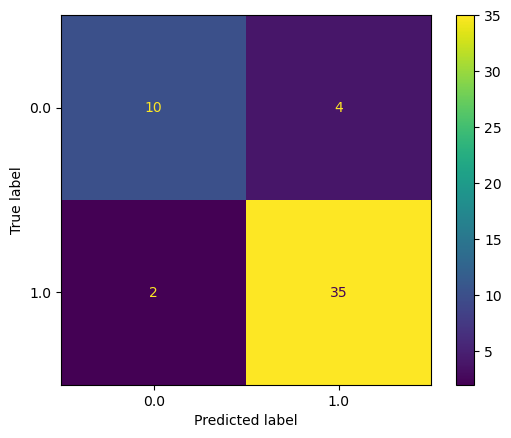

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_val, Y_val)
plt.show()

In [32]:
print(metrics.classification_report
	(Y_val, models[0].predict(X_val)))

              precision    recall  f1-score   support

         0.0       0.83      0.71      0.77        14
         1.0       0.90      0.95      0.92        37

    accuracy                           0.88        51
   macro avg       0.87      0.83      0.85        51
weighted avg       0.88      0.88      0.88        51

